<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Предварительные-операции" data-toc-modified-id="Предварительные-операции-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительные операции</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Предварительный-анализ" data-toc-modified-id="Предварительный-анализ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предварительный анализ</a></span></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Добавление признаков</a></span></li><li><span><a href="#Подготовка-выборок-с-признаками-и-целевым-признаком" data-toc-modified-id="Подготовка-выборок-с-признаками-и-целевым-признаком-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка выборок с признаками и целевым признаком</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-(DecisionTreeRegressor)" data-toc-modified-id="Дерево-решений-(DecisionTreeRegressor)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений (DecisionTreeRegressor)</a></span></li><li><span><a href="#Случайный-лес-(RandomForestRegressor)" data-toc-modified-id="Случайный-лес-(RandomForestRegressor)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес (RandomForestRegressor)</a></span></li><li><span><a href="#Линейная-регрессия-(LinearRegression)" data-toc-modified-id="Линейная-регрессия-(LinearRegression)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия (LinearRegression)</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#Градиентный-бустинг-(библиотека-CatBoost)" data-toc-modified-id="Градиентный-бустинг-(библиотека-CatBoost)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Градиентный бустинг (библиотека CatBoost)</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания, предоставляющая услуги такси, собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Цель исследования** — построить модель машинного обучения для прогнозирования количества заказов в такси в аэропортах на следующий час с метрикой *RMSE* не менее 48.

**Задачи исследования**
* подготовить данные для обучения моделей машинного обучения;
* обучить несколько моделей машинного обучения;
* выбрать из обученных моделей машинного обучения оптимальную с точки зрения качества предсказания.

При выполнении проекта планирую:
1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

## Подготовка

### Предварительные операции

Установим необходимые библиотеки.

In [28]:
# установка библиотеки shap
!pip install -q shap

Импортируем необходимые библиотеки.

In [29]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap

Прочитаем файл `taxi.csv` и сохраним данные из файла в переменную `df`.

In [30]:
# сохранение данных в датафрейме
try:
    # Ссылка на датасет, сохраненный на домашнем ноутбуке
    df = pd.read_csv(
        'D:\\YandexDisk\\Data science\\Яндекс. Практикум\\Спринт 12. Временные ряды\\Проект\\taxi.csv', index_col=[0], parse_dates=[0])
except:
    # Ссылка на датасет, сохраненный на сервере Яндекс
    df = pd.read_csv(
        '/datasets/taxi.csv', index_col=[0], parse_dates=[0])

Рассмотрим первые строки датафрейма, чтобы получить первое впечатление о них.

In [31]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Рассмотрим общую информацию о датафрейме.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Рассчитаем долю пропусков в столбце.

In [33]:
df.isna().mean()

num_orders    0.0
dtype: float64

Рассмотрим статистические данные о датафрейме.

In [34]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


В датафрейме содержится временной ряд  с числовыми значениями типа `float64`.

Согласно документации к данным в столбце `num_orders` содержатся данные о количестве заказов такси в аэропортах. 

В задании необходимо решить задачу регрессии - предсказать значение целевого признака (который содержится в столбце `num_orders`).

Проверим, в хронологическом ли порядке расположены данные в датафрейме.

In [35]:
df.index.is_monotonic

True

Рассмотрим, из какого диапазона дат приведены данные в датафрейме.

In [36]:
df.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

У нас есть данные за период с 2018.03.01 по 2018.08.31 с шагом 20 минут.

### Выводы

Предварительно можно сказать, что данных для выполнения проекта достаточно.

## Анализ

### Предварительный анализ

Выполним ресемплинг данных с шагом 1 час.

In [37]:
df = df.resample('1H').sum()

Построим график по значениям из датафрейма.

<AxesSubplot:xlabel='datetime'>

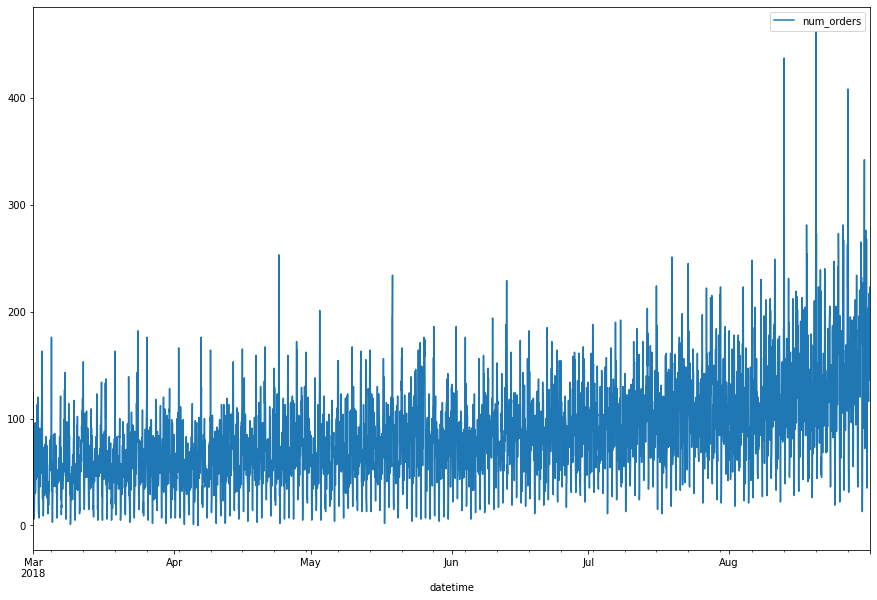

In [38]:
df.plot(figsize=(15,10))

Для анализа временного ряда используем функцию `seasonal_decompose`.

In [39]:
decomposed = seasonal_decompose(df)

Рассмотрим график тренда.

<AxesSubplot:xlabel='datetime'>

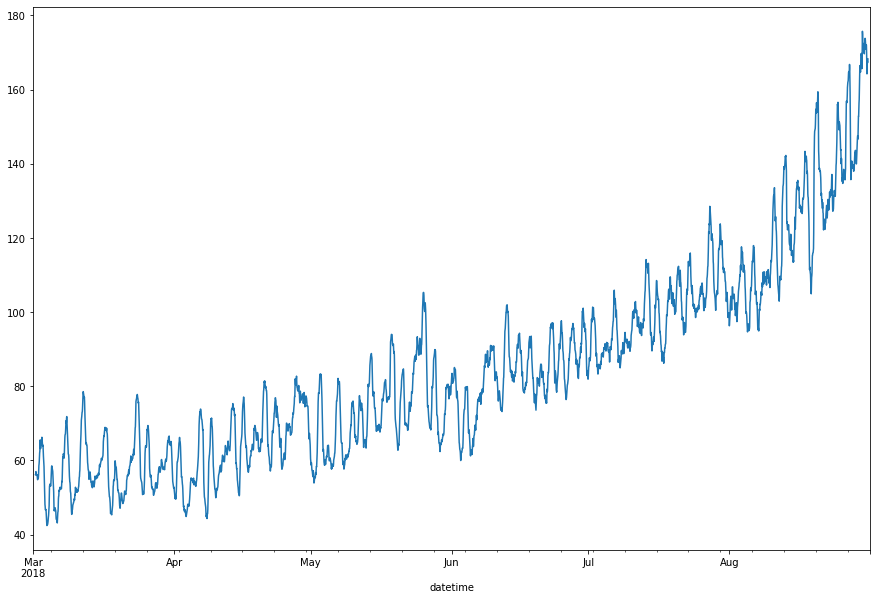

In [40]:
decomposed.trend.plot(figsize=(15,10))

Виден тренд к увеличению количества заказов, что, скорее всего, связано с наступлением сезона летних отпусков.

Рассмотрим график сезонности на периоде 1 месяц.

<AxesSubplot:xlabel='datetime'>

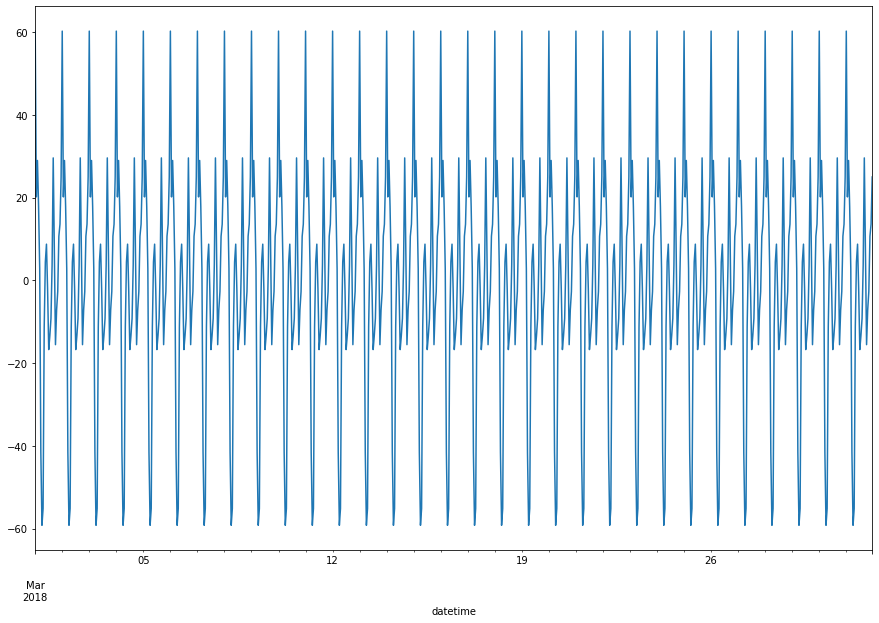

In [41]:
decomposed.seasonal['2018-03-01':'2018-03-31'].plot(figsize=(15,10))

Рассмотрим график сезонности на периоде 1 день.

<AxesSubplot:xlabel='datetime'>

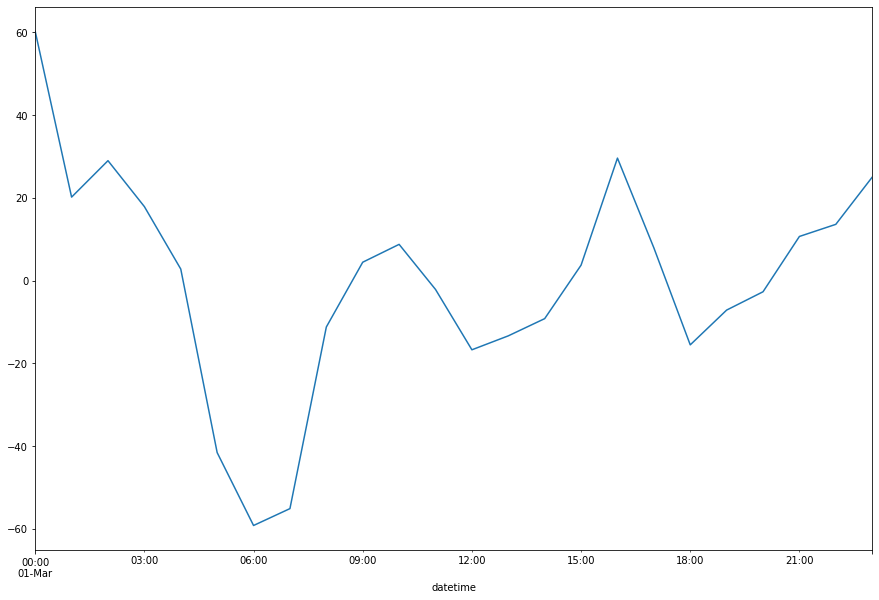

In [42]:
decomposed.seasonal['2018-03-01':'2018-03-01'].plot(figsize=(15,10))

Как мы видим, количество заказов сильно зависит от времени суток.

### Добавление признаков

Добавим признаки:
* выделим месяц, число, день недели, час;
* данные за предыдущие часы;
* скользящее среднее.

In [43]:
def make_features(data, max_lag, rolling_mean_size):
    df = data.copy()
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    for lag in range(23, 23+max_lag):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
     
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    return df

In [44]:
df = make_features(df, 3, 3)

Удалим строки с пропусками, появившиеся после создания новых признаков.

In [45]:
df = df.dropna()

### Подготовка выборок с признаками и целевым признаком

Разделим датафрейм на датафрейм, в котором содержатся признаки, и датафрейм, в котором содержатся целевые признаки.

In [46]:
df_features = df.drop(['num_orders'], axis=1)
df_target = df['num_orders']

Разделим датафрейм на обучающий, валидационный и тестовый.

In [47]:
df_features_train_valid, df_features_test, df_target_train_valid, df_target_test = (
    train_test_split(df_features, df_target, test_size=0.1, shuffle=False)
)

### Выводы

* данные имеют возрастающий тренд, связанный, скорее всего, с наступлением сезона отпусков;
* данные имеют ярко выраженную сезонность с периодом 1 сутки;
* добавлены признаки (месяц, число, день недели, час, данные за предыдущие часы, скользящее среднее);
* выполнена разбивка датафрейма на необходимые датафреймы (обучающий, тестовый, валидационный), в которых содержатся признаки и целевой признак.

## Обучение

### Дерево решений (DecisionTreeRegressor)

Обучим модель дерева решений и оценим значение *RMSE*.

In [48]:
%%time

def cross_val_rmse(features, target, blocks, regression_model):
    
    rmse_train_scores = []
    rmse_valid_scores = []
    
    tscv = TimeSeriesSplit(n_splits=blocks)
    
    features = features.reset_index()
    target = target.reset_index()
    
    for train_index, valid_index in tscv.split(features):
        features_train, features_valid = features.iloc[train_index], features.iloc[valid_index]
        target_train, target_valid = target.iloc[train_index], target.iloc[valid_index]
        
        features_train = features_train.set_index('datetime')
        features_valid = features_valid.set_index('datetime')
        target_train = pd.Series(target_train.set_index('datetime')['num_orders'])
        target_valid = pd.Series(target_valid.set_index('datetime')['num_orders'])
        
        model = regression_model
        model = model.fit(features_train, target_train.values)
        rmse_train_score = mean_squared_error(model.predict(features_train), target_train.values) ** 0.5
        rmse_valid_score = mean_squared_error(model.predict(features_valid), target_valid) ** 0.5
        
        rmse_train_scores.append(rmse_train_score)
        rmse_valid_scores.append(rmse_valid_score)
    
    # рассчитаем среднее значение качества модели
    print('Среднее значение метрики RMSE модели на обучающей выборке:', np.mean(rmse_train_scores))
    print('Среднее значение метрики RMSE модели на валидационной выборке:', np.mean(rmse_valid_scores))
    
    return np.mean(rmse_train_scores), np.mean(rmse_valid_scores)
    
# выполнение функции
decision_tree_train_rmse, decision_tree_valid_rmse = cross_val_rmse(
    df_features_train_valid, df_target_train_valid, 3, DecisionTreeRegressor(random_state=1))

Среднее значение метрики RMSE модели на обучающей выборке: 0.0
Среднее значение метрики RMSE модели на валидационной выборке: 38.75578574740899
CPU times: total: 0 ns
Wall time: 87.6 ms


### Случайный лес (RandomForestRegressor)

Обучим модель случайного леса и оценим значение *RMSE*.

In [49]:
%%time

random_forest_train_rmse, random_forest_valid_rmse = cross_val_rmse(
    df_features_train_valid, df_target_train_valid, 3, RandomForestRegressor(random_state=1, n_estimators=500))

Среднее значение метрики RMSE модели на обучающей выборке: 7.134298470677227
Среднее значение метрики RMSE модели на валидационной выборке: 27.414471802085647
CPU times: total: 8.97 s
Wall time: 15.3 s


### Линейная регрессия (LinearRegression)

Обучим модель линейной регрессии и оценим значение *RMSE*.

In [50]:
%%time

linear_regression_train_rmse, linear_regression_valid_rmse = cross_val_rmse(
    df_features_train_valid, df_target_train_valid, 3, LinearRegression())

Среднее значение метрики RMSE модели на обучающей выборке: 22.65869126312253
Среднее значение метрики RMSE модели на валидационной выборке: 27.950528561539993
CPU times: total: 15.6 ms
Wall time: 44.8 ms


### ElasticNet

Обучим модель ElasticNet и оценим значение *RMSE*.

In [51]:
%%time

elastic_net_train_rmse, elastic_net_valid_rmse = cross_val_rmse(
    df_features_train_valid, df_target_train_valid, 3, ElasticNet(max_iter=2000))

Среднее значение метрики RMSE модели на обучающей выборке: 22.668427749891475
Среднее значение метрики RMSE модели на валидационной выборке: 28.022496897013724
CPU times: total: 31.2 ms
Wall time: 108 ms


### Градиентный бустинг (библиотека CatBoost)

Обучим модель градиентного бустинга и оценим значение *RMSE*.

In [ ]:
%%time

rmse_train_scores = []
rmse_valid_scores = []

tscv = TimeSeriesSplit(n_splits=3)

features = df_features_train_valid.reset_index()
target = df_target_train_valid.reset_index()

for train_index, valid_index in tscv.split(features):
    features_train, features_valid = features.iloc[train_index], features.iloc[valid_index]
    target_train, target_valid = target.iloc[train_index], target.iloc[valid_index]

    features_train = features_train.set_index('datetime')
    features_valid = features_valid.set_index('datetime')
    target_train = pd.Series(target_train.set_index('datetime')['num_orders'])
    target_valid = pd.Series(target_valid.set_index('datetime')['num_orders'])

    train_dataset = cb.Pool(features_train, target_train) 

    grid = {'iterations': [100, 150, 300],
            'learning_rate': [0.02, 0.1],
            'depth': [2, 4, 6, 8],
            'l2_leaf_reg': [0.2, 0.5, 1, 3]}

    model = cb.CatBoostRegressor(loss_function='RMSE')
    model.grid_search(grid, train_dataset)

    model = model.fit(features_train, target_train.values)
    rmse_train_score = mean_squared_error(model.predict(features_train), target_train.values) ** 0.5
    rmse_valid_score = mean_squared_error(model.predict(features_valid), target_valid) ** 0.5

    rmse_train_scores.append(rmse_train_score)
    rmse_valid_scores.append(rmse_valid_score)

In [53]:
catboost_train_rmse = np.mean(rmse_train_scores)
catboost_valid_rmse = np.mean(rmse_valid_scores)
    
# рассчитаем среднее значение качества модели
print('Среднее значение метрики RMSE модели на обучающей выборке:', catboost_train_rmse)
print('Среднее значение метрики RMSE модели на валидационной выборке:', catboost_valid_rmse)

Среднее значение метрики RMSE модели на обучающей выборке: 11.622443324045761
Среднее значение метрики RMSE модели на валидационной выборке: 26.395984646919867


### Сравнение моделей

Сведем собранные данные в таблицу.

In [54]:
pd.DataFrame({'ML model':['RMSE (train) value', 'RMSE (test) value'],
             'DecisionTreeRegressor':[decision_tree_train_rmse, decision_tree_valid_rmse],
             'RandomForestRegressor':[random_forest_train_rmse, random_forest_valid_rmse],
             'LinearRegressionResults':[linear_regression_train_rmse, linear_regression_valid_rmse],
             'ElasticNetResults':[elastic_net_train_rmse, elastic_net_valid_rmse],
             'GradientBoostingResults':[catboost_train_rmse, catboost_valid_rmse]}
            ).set_index('ML model').T.sort_values(by = ['RMSE (test) value'])

ML model,RMSE (train) value,RMSE (test) value
GradientBoostingResults,11.622443,26.395985
RandomForestRegressor,7.134298,27.414472
LinearRegressionResults,22.658691,27.950529
ElasticNetResults,22.668428,28.022497
DecisionTreeRegressor,0.000000,38.755786


Как мы видим, наилучшее значение *RMSE* получено для модели градиентного бустинга.

### Выводы

Обучены 5 моделей, наилучший результат получен для модели градиентного бустинга.

## Тестирование

Выполним определение *RMSE* для модели градиентного бустинга, обученной на обучающей и тестовой выборках.

In [ ]:
train_dataset = cb.Pool(df_features_train_valid, df_target_train_valid) 
model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 300],
        'learning_rate': [0.02, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid, train_dataset)

In [56]:
catboost_train_valid_rmse = (np.sqrt(mean_squared_error(df_target_train_valid, model.predict(df_features_train_valid))))
predicted_values = model.predict(df_features_test)
catboost_test_rmse = (np.sqrt(mean_squared_error(df_target_test, predicted_values)))

print(f'Значение RMSE на обучающей выборке : {catboost_train_valid_rmse}')
print(f'Значение RMSE на тестовой выборке: {catboost_test_rmse}')

Значение RMSE на обучающей выборке: 14.033231485112207
Значение RMSE на тестовой выборке: 41.80865131516788


Рассмотрим, насколько большое влияние оказывают на модель признаки, используя `feature_importance` и `shap`.

Text(0.5, 0, 'CatBoost Feature Importance')

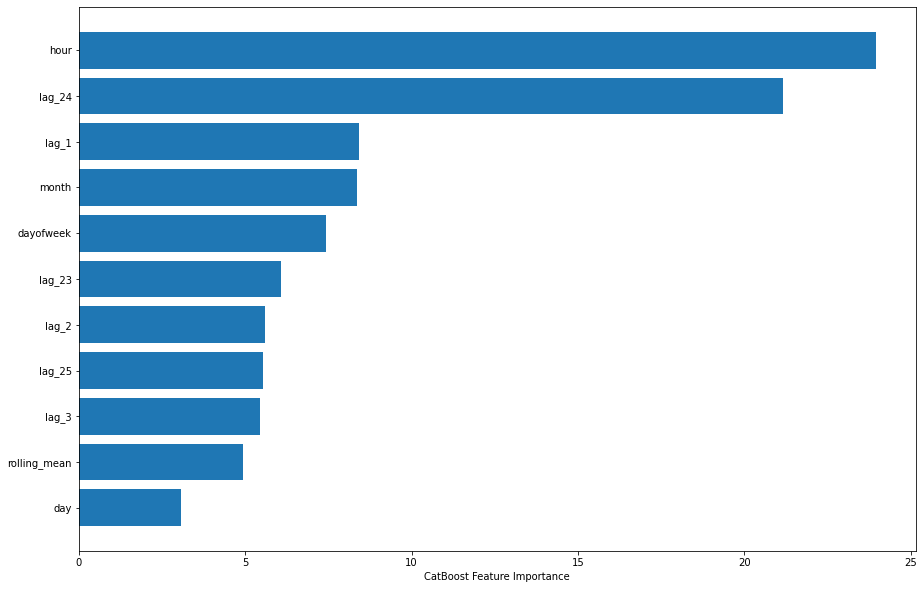

In [65]:
sorted_feature_importance = model.feature_importances_.argsort()
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.barh(df_features.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel('CatBoost Feature Importance')


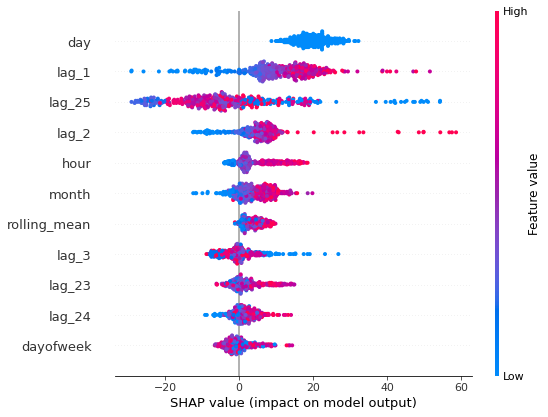

In [58]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_features_test)
shap.summary_plot(shap_values, df_features_test, feature_names = df_features.columns[sorted_feature_importance])

Наибольшее влияние оказывают признаки `lag_1`, `lag_24`, `hour`, `day`.

Отобразим на графике значения, предсказанные моделью, и действительные значения количества заказов такси.

In [59]:
predicted_values = pd.Series(predicted_values, index = df_target_test.index)

Text(0, 0.5, 'Number of Orders')

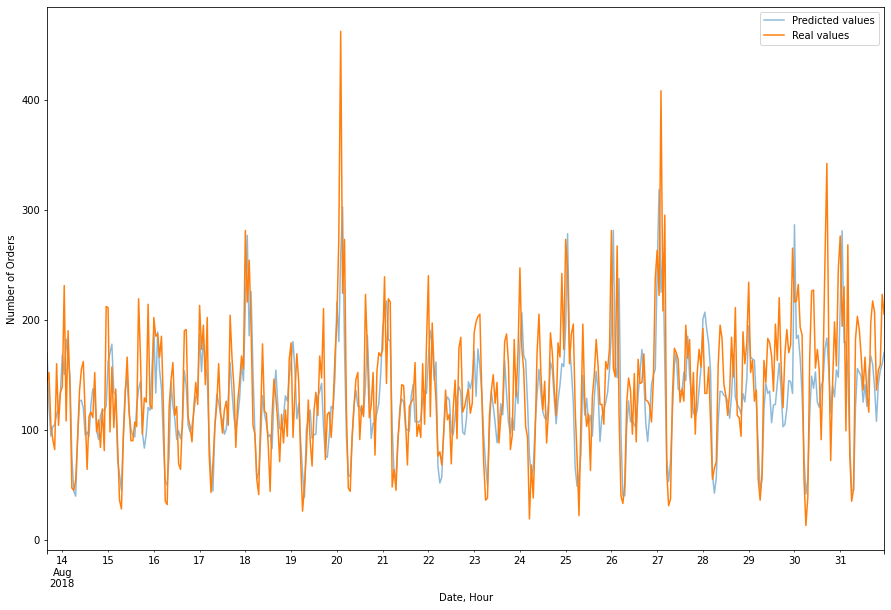

In [60]:
predicted_values.plot(figsize=(15,10), alpha = 0.5, label='Predicted values')
df_target_test.plot(label='Real values')
plt.legend()
plt.xlabel('Date, Hour')
plt.ylabel('Number of Orders')

Посмотрим, насколько реальные значения в среднем отличаются от предсказанных.

In [61]:
(predicted_values - df_target_test).mean()

-11.300026881992205

Систематическая ошибка достаточно большая, чтобы сделать вывод, что модель извлекла не всю полезную информацию из данных - она может быть улучшена.

## Выводы

В предварительной части исследования выполнен анализ и обработка исходного датафрейма:
* данные имеют возрастающий тренд, связанный, скорее всего, с наступлением сезона отпусков;
* данные имеют ярко выраженную сезонность с периодом 1 сутки;
* добавлены признаки (месяц, число, день недели, час, данные за предыдущие часы, скользящее среднее);
* выполнена разбивка датафрейма на необходимые датафреймы (обучающий, тестовый, валидационный), в которых содержатся признаки и целевой признак.

Обучены 5 моделей:
* дерево решений;
* случайный лес;
* линейная регрессия;
* ElasticNet;
* градиентный бустинг (CatBoost).

Исходя из критерия задания (наименьшее значение *RMSE*), выбрана наилучшая модель - модель градиентного бустинга (CatBoost).

По значению средней ошибки предсказаний можно сделать вывод, что модель может быть улучшена.

Можно рекомендовать данную модель для использования в сервисе заказа такси.